# 1 - Ejercicio de desarrollo de API para hostear modelo de Machine Learning

En este ejercicio deberas desarrollar una **API con FastAPI** que servirá un modelo de Machine Learning (previamente entrenado) para **predecir la supervivencia** de pasajeros del Titanic.

---

## Objetivo Principal

1. **Cargar el modelo** entrenado (un Random Forest que predice `survived`).
2. **Ofrecer un endpoint de predicción** que reciba los datos de un pasajero (ej. edad, clase, etc.) y devuelva si sobrevive (`1`) o no (`0`).

---

## Requerimientos

1. **Modelo Entrenado**  
   - Utilizar el archivo `modelo_titanic.joblib`.
   - Asegurarse de que se cargue correctamente al iniciar la aplicación.

2. **Endpoints**  
   - **Predicción**: Un endpoint que reciba los datos del pasajero mediante un método (por ejemplo, `POST`) y devuelva la predicción (`0` o `1`).

3. **Validación de Datos**  
   - Emplear **Pydantic** para validar los campos y tipos de datos que se reciban en el endpoint de predicción.

4. **Documentación Automática**  
   - Asegurar que la API cuente con la documentación generada por FastAPI (Swagger UI).

5. **Entrega**  
   - Incluir un archivo `README.md` o similar con instrucciones para ejecutar la API localmente.
   - *(Opcional)* Incluir un contenedor Docker para facilitar su despliegue.

---

## Criterios de Evaluación

- **Funcionalidad**:  
  La API debe poder cargar el modelo y realizar predicciones correctas.

- **Simplicidad y Limpieza**:  
  Se evaluará la estructura del proyecto, la legibilidad del código y las buenas prácticas de FastAPI.

- **Documentación**:  
  Es importante contar con explicaciones básicas en el código y aprovechar la documentación automática de FastAPI.

- **Manejo de Errores**:  
  La API debe responder adecuadamente ante errores de validación o datos de entrada incorrectos.

In [3]:
# Ejemplo de uso del modelo.

import joblib
import numpy as np

# Cargar el modelo
modelo = joblib.load("artifacts/modelo_titanic.joblib")

X_prueba = np.array([[3, 1, 22.0, 1, 0, 7.25, 0]])

prediccion = modelo.predict(X_prueba)

print("Predicción:", "Sobrevivió" if prediccion[0] == 1 else "No sobrevivió")

Predicción: No sobrevivió


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.4.1.post1 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.4.1.post1 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


## Feature importance analysis

- [ ] TO DO --> analizar si puedo prescindir de alguna feature poco importante y aún así predecir, agregando una key en el dict de response con la(s) missing features

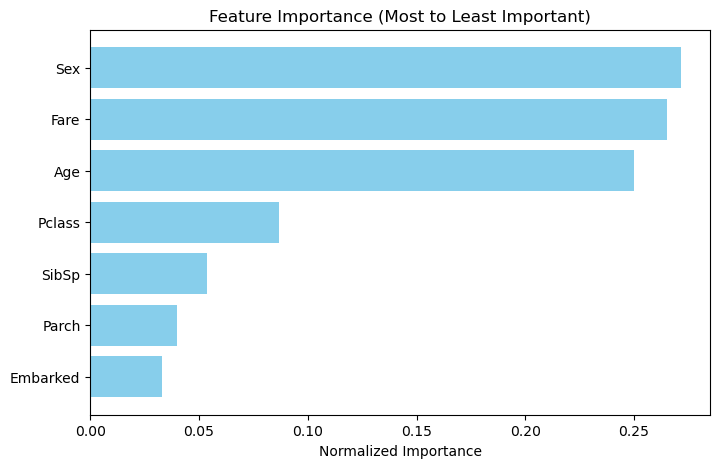

In [ ]:
import matplotlib.pyplot as plt

features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
importances = modelo.feature_importances_
normalized_importances = importances / importances.sum()

sorted_indices = normalized_importances.argsort()[::-1]
sorted_features = [features[i] for i in sorted_indices]
sorted_importances = normalized_importances[sorted_indices]



plt.figure(figsize=(8, 5))
plt.barh(sorted_features, sorted_importances, color='skyblue')
plt.xlabel('Normalized Importance')
plt.title('Feature Importance (Most to Least Important)')
plt.gca().invert_yaxis()
plt.show()

# 2 - Ejercicio de Prompt Engineering para un bot de consultas de una fintech

## Objetivo
Diseñar un prompt unificado aplicando tecnicas de in-context learning que oriente al modelo a responder consultas de clientes de forma clara, precisa y empática, demostrando además su proceso de razonamiento. La fintech ofrece como productos **tarjetas de débito**, **tarjetas de crédito** y **préstamos**.

---

## Instrucciones

1. **Definir el Rol del Asistente**  
   Especifica el rol del modelo:
   > "Eres un asistente virtual especializado en atención al cliente para una fintech que ofrece tarjetas de débito, tarjetas de crédito y préstamos. Responde a las consultas con claridad, precisión y empatía."

2. **One-Shot**  
   Proporciona un único ejemplo para establecer el tono y formato:
   - **Ejemplo:**  
     - **Entrada:** "Acabo de recibir mi tarjeta de débito y no sé cómo activarla."  
     - **Respuesta Esperada:** "¡Hola! Para activar tu tarjeta de débito, ingresa a nuestra app y sigue las instrucciones enviadas por correo. ¿Necesitas ayuda con algo más?"\
       
3. **Chain-of-Thought**  
   Instruye al modelo para que exponga brevemente su razonamiento antes de dar la respuesta final:
   > "Antes de proporcionar la respuesta final, explica brevemente los pasos que sigues:  
   > 1. Identifica el tema de la consulta (tarjeta de débito, crédito o préstamo).  
   > 2. Recuerda los beneficios, condiciones o requisitos relevantes.  
   > 3. Integra la información de forma clara y estructurada en tu respuesta final."

4. **Consulta Final para el Ejercicio**  
   Responde a la siguiente consulta utilizando los tres enfoques:
   - **Entrada del Cliente:**  
     "Estoy evaluando adquirir una tarjeta de crédito, pero tengo dudas sobre sus condiciones y límites."
   - **Proceso (Chain-of-Thought):**  
     1. Detecta que se trata de una consulta sobre tarjeta de crédito.  
     2. Recuerda que las condiciones incluyen un límite basado en el perfil financiero y beneficios adicionales (puntos, descuentos, etc.), podes agregarle extras o detalles como un plus.
     3. Integra estos elementos en la respuesta.
   - **Modelo de Respuesta Final:**  
     "¡Hola! Para tu nueva tarjeta de crédito, las condiciones se establecen según tu perfil financiero, lo que determina un límite adecuado para ti. Además, esta tarjeta ofrece beneficios como acumulación de puntos y descuentos en comercios asociados. Puedes revisar más detalles en el estado de cuenta de nuestra app o contactarnos para asesorarte. ¿Te gustaría más información sobre algún aspecto en particular?"

---

## Entregables

- **Prompt Unificado:**  
  Documento que contenga:
  - Definición del rol.
  - Ejemplos one-shot.
  - Instrucciones para el chain-of-thought.
  
- **Justificación:**  
  Breve explicación de cómo se integraron los tres enfoques y cómo ayudan a obtener respuestas de alta calidad.

- **Ejemplos de Salidas:**  
  Simulaciones o capturas de pantalla demostrando el funcionamiento del prompt en distintos escenarios.


- **Definir metodos de evaluacion de este prompt asumiendo que este agendo esta en un entorno productivo**

# 3 - Diseño Conceptual de una Arquitectura RAG para Ueno Bank con Amazon Bedrock

## **Objetivo**
Diseñar una arquitectura **RAG (Retrieval-Augmented Generation)** que permita a los empleados de Ueno Bank consultar información interna proveniente de diferentes fuentes mediante lenguaje natural, utilizando exclusivamente servicios de la nube de AWS.

### 1. Identificar Componentes Clave
- **Fuentes de Datos:** Documentos internos (PDFs, bases de datos).
- **Almacenamiento:** Seleccionar un servicio de almacenamiento escalable para guardar los documentos.
- **Indexación y Búsqueda:** Elegir una herramienta o servicio para indexar y facilitar la búsqueda eficiente de la información
- **Modelo:** Integrar un LLM que pueda generar respuestas basadas en las consultas realizadas.
- **Orquestación y Seguridad:** Definir cómo se gestionarán las llamadas al servicio y disponiblizacion de una API para consumirlo desde un backend.

### 2. Crear un Diagrama Básico de la Arquitectura
- Representar la interacción entre los componentes mencionados.
- Mostrar el flujo de datos desde la consulta del usuario hasta la generación de la respuesta.

### 3. Describir Cada Componente
- Explicar brevemente el propósito de cada componente.
- Justificar la elección de los servicios de AWS seleccionados.

### 4. Proponer metodo de evaluacion de retrieval
- Explicar que metricas utilizarias y que libreria utilizarias para este fin.
<!--  -->
## **Formato de Entrega**
- **Diagrama de Arquitectura:** Utilizar herramientas como scaldraw o similar para crear un diagrama claro y sencillo.
- **Descripción de Componentes:** Documento breve explicando cada parte del diagrama.